In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import confusion_matrix
import numpy as np
from sklearn.metrics import accuracy_score
from tabulate import tabulate

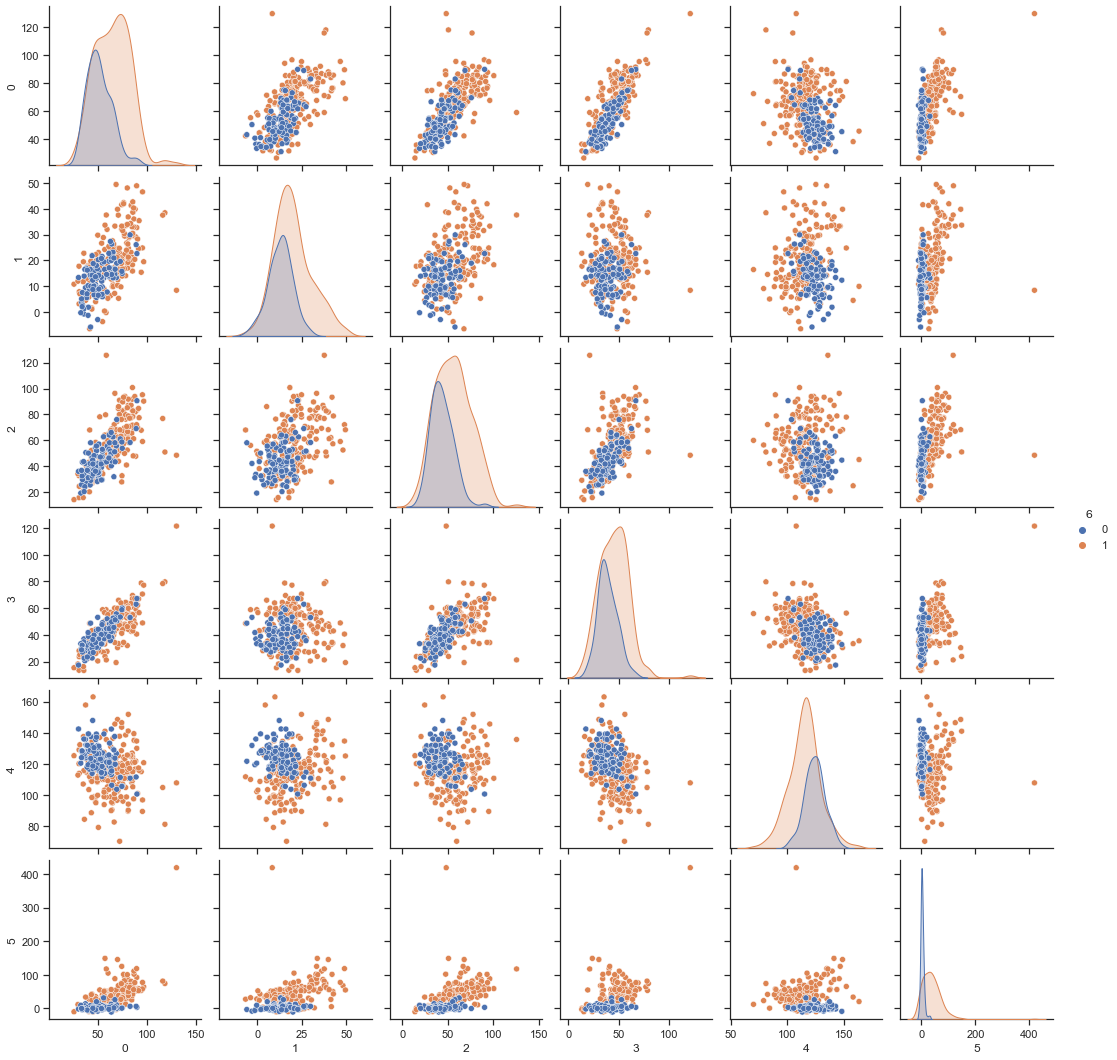

In [2]:
##(b)i
df = pd.read_table("./data/column_2C.dat", header=None, sep="\s+")
df = df.replace('NO',0)
df = df.replace('AB',1)
sns.set_theme(style="ticks")
sns.pairplot(df, hue = 6)

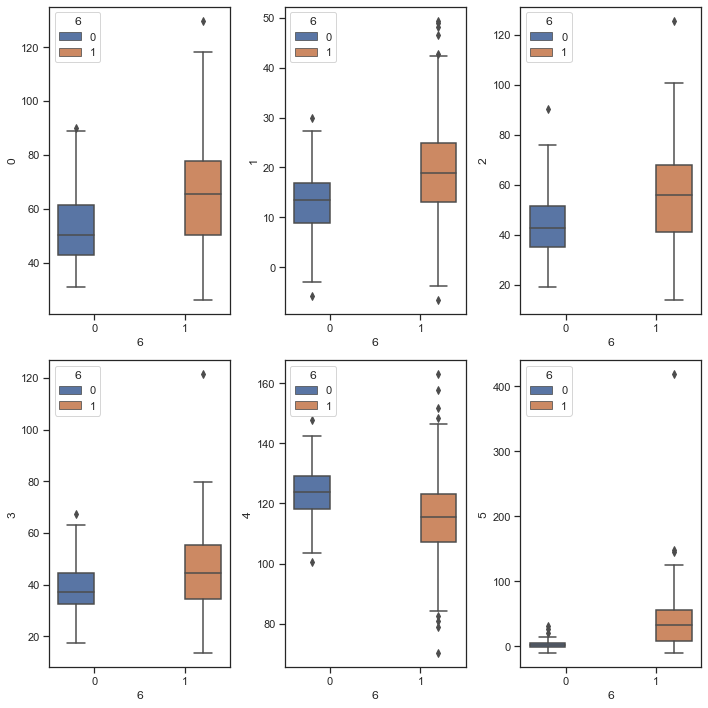

In [3]:
##(b)ii
f, axes = plt.subplots(2, 3, figsize=(10, 10))
for i in range(3):
    sns.boxplot(x=6, y = i, hue=6, data=df, ax = axes[0][i])
for i in range(3):
    sns.boxplot(x=6, y = i + 3, hue=6, data=df, ax = axes[1][i])
f.tight_layout()
plt.show()

In [4]:
##(b)iii
df = df.replace('NO',0)
df = df.replace('AB',1)
df1 = df[df[6] == 0][0:70]
df2 = df[df[6] == 1][0:140]
train = pd.concat([df1, df2], axis=0)
df3 = df[df[6] == 0][70:]
df4 = df[df[6] == 1][140:]
test = pd.concat([df3, df4], axis=0)

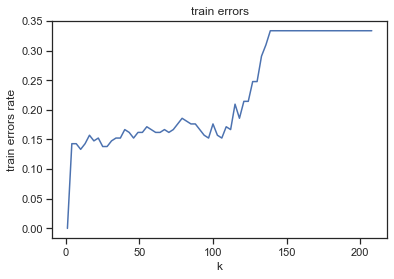

In [5]:
##c(ii) train error
X_train, Y_train, X_test, Y_test = train.iloc[: , :6], train[6],test.iloc[: , :6], test[6]
errlist_train = []
for k in np.linspace(208,1,70, dtype = int):
    classifier = KNeighborsClassifier(n_neighbors=k, p = 2)
    classifier.fit(X_train, Y_train)
    ypred = classifier.predict(X_train)
    acc = accuracy_score(y_true= Y_train, y_pred=ypred)
    errlist_train.append((1 - acc))
plt.plot(np.linspace(208,1,70, dtype = int), errlist_train)
plt.title('train errors')
plt.xlabel('k') 
plt.ylabel('train errors rate') 
plt.show()

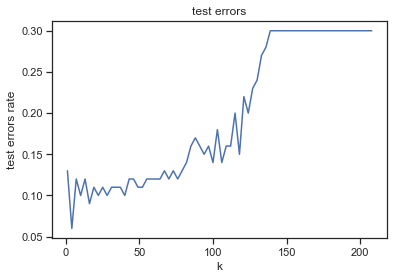

In [6]:
##c(ii) test error
errlist_test = []

for k in np.linspace(208,1,70, dtype = int):
    classifier = KNeighborsClassifier(n_neighbors=k, p = 2)
    classifier.fit(X_train, Y_train)
    ypred = classifier.predict(X_test)
    acc = accuracy_score(y_true=Y_test, y_pred=ypred)
    errlist_test.append((1 - acc))
plt.plot(np.linspace(208,1,70, dtype = int), errlist_test)
plt.title('test errors')
plt.xlabel('k') 
plt.ylabel('test errors rate') 
plt.show()

In [7]:
##c(ii) output
errlist_test.index(min(errlist_test))
#best k is 4
k = 4
classifier = KNeighborsClassifier(n_neighbors=k, p = 2)
classifier.fit(X_train, Y_train)
ypred = classifier.predict(X_test)
confusion = confusion_matrix(Y_test, ypred)
TP = confusion[0][0]
FP = confusion[1][0]
FN = confusion[0][1]
TN = confusion[1][1]
TPR = TP/(TP+FN)
TNR = TN/(TN+FP) 
precision = TP/(TP + FP)
F1 = 2 * (precision * TPR) / (precision + TPR)
print(confusion)
print('true positive rate is %f'% TPR + '. true negative rate is %f'% TNR + '. precision is %f'% precision + '. F1 score is %f'% F1)

[[25  5]
 [ 1 69]]
true positive rate is 0.833333. true negative rate is 0.985714. precision is 0.961538. F1 score is 0.892857


Text(0, 0.5, 'test errors rate')

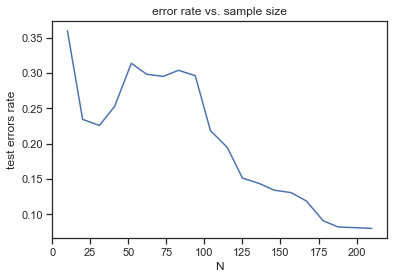

In [8]:
##c(iii)
N = np.linspace(10,210,20, dtype = int)
opt = []
for n in N:
    df1 = df[df[6] == 0][0:int(n/3)]
    df2 = df[df[6] == 1][0:(n-int(n/3))]
    train = pd.concat([df1, df2], axis=0)
    df3 = df[df[6] == 0][int(n/3):]
    df4 = df[df[6] == 1][(n-int(n/3)):]
    test = pd.concat([df3, df4], axis=0)
    X_train, Y_train, X_test, Y_test = train.iloc[: , :6], train[6],test.iloc[: , :6], test[6]
    err_list = []
    for k in np.arange(1,n,5):
        classifier = KNeighborsClassifier(n_neighbors=k, p = 2)
        classifier.fit(X_train, Y_train)
        ypred = classifier.predict(X_test)
        acc = accuracy_score(y_true=Y_test, y_pred=ypred)
        err_list.append(1-acc)
    opt.append(min(err_list[1:])) 
plt.plot(np.linspace(10,210,20, dtype = int), opt)
plt.title('error rate vs. sample size')
plt.xlabel('N') 
plt.ylabel('test errors rate')

In [9]:
##d(i)A
errlist = []
for k in np.arange(1,196,5):
    classifier = KNeighborsClassifier(n_neighbors=k, p = 1)
    classifier.fit(X_train, Y_train)
    ypred = classifier.predict(X_test)
    acc = accuracy_score(y_true=Y_test, y_pred=ypred)
    errlist.append(1 - acc)
best_k = errlist.index(min(errlist[1:]))*5 + 1
min(errlist[1:])

0.10999999999999999

In [10]:
##d(i)B
errlist = []
n = np.arange(0.1,1.1,0.1)
squares=list(map(lambda x:pow(10,x),n))
for p in squares:
    classifier = KNeighborsClassifier(n_neighbors=best_k, p = p)
    classifier.fit(X_train, Y_train)
    ypred = classifier.predict(X_test)
    acc = accuracy_score(y_true=Y_test, y_pred=ypred)
    errlist.append(1 - acc)
min(errlist[1:])
errlist.index(min(errlist[1:]))
print('min log10p is 0.6 and min test error is %f' %min(errlist[1:]))

min log10p is 0.6 and min test error is 0.060000


In [11]:
##d(i)C
errlist = []
for k in np.arange(1,196,5):
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'chebyshev')
    classifier.fit(X_train, Y_train)
    ypred = classifier.predict(X_test)
    acc = accuracy_score(y_true=Y_test, y_pred=ypred)
    errlist.append(1 - acc)
min(errlist[1:])

0.07999999999999996

In [12]:
##d(ii)
errlist = []
for k in np.arange(1,196,5):
    classifier = KNeighborsClassifier(n_neighbors=k, metric = 'mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(X_train.T))})
    classifier.fit(X_train, Y_train)
    ypred = classifier.predict(X_test)
    acc = accuracy_score(y_true=Y_test, y_pred=ypred)
    errlist.append(1 - acc)
min(errlist[1:])

0.17000000000000004

In [13]:
##d summary
data = [[" Manhattan Distance", 0.11], 
        ["p = 0.6", 0.09], 
        ["Chebyshev", 0.08],
       ["Mahalanobis", 0.17]]
col_names = ["distace", "test error"]
print(tabulate(data, headers=col_names))

distace               test error
------------------  ------------
Manhattan Distance          0.11
p = 0.6                     0.09
Chebyshev                   0.08
Mahalanobis                 0.17


In [14]:
##e
df1 = df[df[6] == 0][0:70]
df2 = df[df[6] == 1][0:140]
train = pd.concat([df1, df2], axis=0)
df3 = df[df[6] == 0][70:]
df4 = df[df[6] == 1][140:]
test = pd.concat([df3, df4], axis=0)
X_train, Y_train, X_test, Y_test = train.iloc[: , :6], train[6],test.iloc[: , :6], test[6]

#Euclidean
errlist = []
for k in np.linspace(208,1,70, dtype = int):
    classifier = KNeighborsClassifier(n_neighbors=k,  weights = 'distance', p = 2)
    classifier.fit(X_train, Y_train)
    ypred = classifier.predict(X_test)
    acc = accuracy_score(y_true=Y_test, y_pred=ypred)
    errlist.append((1 - acc))
min(errlist)

0.09999999999999998

In [15]:
#Manhattan
errlist = []
for k in np.linspace(208,1,70, dtype = int):
    classifier = KNeighborsClassifier(n_neighbors=k,  weights = 'distance', p = 1)
    classifier.fit(X_train, Y_train)
    ypred = classifier.predict(X_test)
    acc = accuracy_score(y_true=Y_test, y_pred=ypred)
    errlist.append((1 - acc))
min(errlist)

0.09999999999999998

In [16]:
#Chebyshev
errlist = []
for k in np.linspace(208,1,70, dtype = int):
    classifier = KNeighborsClassifier(n_neighbors=k,  weights = 'distance', metric = 'mahalanobis', metric_params={'VI': np.linalg.inv(np.cov(X_train.T))})
    classifier.fit(X_train, Y_train)
    ypred = classifier.predict(X_test)
    acc = accuracy_score(y_true=Y_test, y_pred=ypred)
    errlist.append((1 - acc))
min(errlist)

0.17000000000000004

In [17]:
#e summary
data = [ ["Euclidean", 0.10],
        ["Manhattan", 0.10],  
        ["Chebyshev", 0.17]]
col_names = ["distace", "test error"]
print(tabulate(data, headers=col_names))

distace      test error
---------  ------------
Euclidean          0.1
Manhattan          0.1
Chebyshev          0.17


In [18]:
#f
print('the lowest train error rate is 0 when k is 1')

the lowest train error rate is 0 when k is 1
